## 26.05.2023 ROC, k-nearest neighbour and decision trees

Copyright (C) 2023, B. Zeller-Plumhoff

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the [GNU General Public License](https://www.gnu.org/licenses/gpl-3.0.html) for more details.

This Jupyter Notebook was created by Berit Zeller-Plumhoff for the course "Data Science for Material Scientists" at Kiel University. 

Within the notebook, you will perform a classification of metallicity using logistic regression, $k$-nearest neighbours and decision trees. Varying the $k$ and depth of the tree, you will assess how these influence your results and compare the performance of the different classifiers using ROC metrics and curves.

We begin by loading the required libraries.

In [1]:
import pandas as pd # library for organizing data
import numpy as np # library for numerial computations
from sklearn import linear_model # the linear_model library establishes a straightforward implementation of a linear regression model
from sklearn.model_selection import train_test_split, KFold, cross_val_score # this library enables the splitting of a data set into training and test data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, RocCurveDisplay, roc_curve, roc_auc_score, log_loss, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt # library for plotting (not interactive)

### Predicting metallicity

For classification of metallicit based on the material compositon, we will use the dataset based on the publication from [Zhuo et al., 2018](https://pubs.acs.org/doi/pdf/10.1021/acs.jpclett.8b00124)<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) that can be accessed through __matminer__. Have a look at last week's notebook to learn more about the dataset and __matminer__.

In this case, we will start by loading the pickle file which we prepared previously.

In [2]:
df=pd.read_pickle('./ismetal_df.pkl')
df.head()

,formula,is_metal,composition,H,He,Li,Be,B,C,N,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,Ag(AuS)2,True,"(Ag, Au, S)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Ag(W3Br7)2,True,"(Ag, W, Br)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Ag0.5Ge1Pb1.75S4,False,"(Ag, Ge, Pb, S)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Ag0.5Ge1Pb1.75Se4,False,"(Ag, Ge, Pb, Se)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Ag2BBr,True,"(Ag, B, Br)",0.0,0,0.0,0.0,0.25,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Assign the dataframe __without__ columns formula" "is_metal" and "composition" to your feature variable X and the "is_metal" column to the observation y. Then split this data into training and test data and train the classifier.

In [3]:
# assign the variables
X=df.drop(["formula","is_metal","composition"],axis=1)
y=df["is_metal"]

# split your data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Now we will sort the data we created above using different algorithms. To do so, use the train data to fit and the test data to predict the classifiers. Do this by employing the [__logistic regression__](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), the [__k-nearest neighbors__](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), and the [__decision tree__](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) classification methods. In the case of classification using __k-nearest neighbors__, we will make predictions considering different numbers of nearest neighbors. The same will be done for the __decision tree__ and the maximum depth of the tree. This can be performed within a loop, where you will __append__ the current model and predictions to a list thereof, which will initially be empty. For the loop, consider the range from $\left[1, 20\right]$. Read the documentation for these methods if necessary.

In [4]:
# logistic regression
model_log_reg = linear_model.LogisticRegression()
model_log_reg=model_log_reg.fit(X_train, y_train)
y_pred_log_reg = model_log_reg.predict(X_test)

# k-nearest neighbours (loop over k)
model_knn=[]
y_pred_knn=[]
for k in range(1,21):
    model_knn_tmp = KNeighborsClassifier(n_neighbors=k)
    model_knn.append(model_knn_tmp.fit(X_train, y_train))
    y_pred_knn.append(model_knn_tmp.predict(X_test))

# decision tree (loop over max_depth)
model_tree=[]
y_pred_tree=[]
for i in range(1,21):
    model_tree_tmp = DecisionTreeClassifier(max_depth=i)
    model_tree.append(model_tree_tmp.fit(X_train, y_train))
    y_pred_tree.append(model_tree_tmp.predict(X_test))

### Confusion matrices

Now that we have made our predictions with the different classifiers, we are interested in checking the generalization performance of our models. This will be done using the [__confusion matrix__](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay). To do this, use the metrics module in the scikit library to create confusion matrices for our train and test data. Build confusion matrices for the three types of classifiers used above. You can also observe what happens when you consider different numbers of neighbors (for the k-nearest neighbors) and different tree depths (for the decision tree). What can you conclude from these different results?

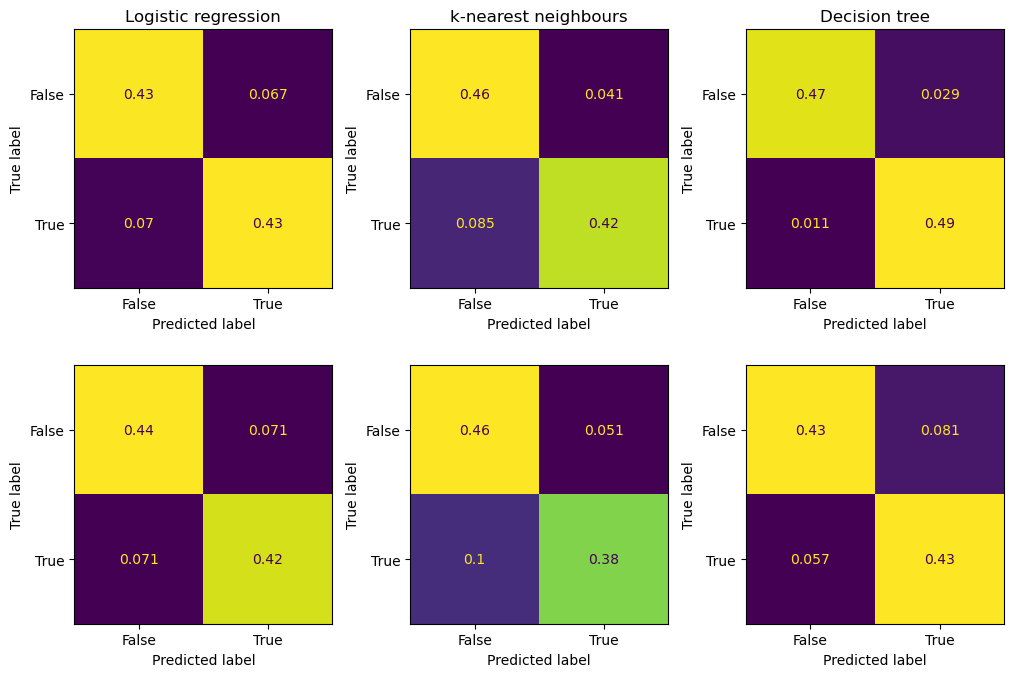

In [5]:
# display the confusion matrices in one figure as three subplots in two rows, one for training and one for testing data
k=10
depth=20
fig,ax=plt.subplots(2,3, figsize=(12,8))
plt.subplots_adjust(wspace=0.3)
cm_display_log_reg = ConfusionMatrixDisplay.from_estimator(model_log_reg,X_train,y_train, normalize='all', colorbar=False,ax=ax[0][0])
ax[0][0].set_title('Logistic regression')
cm_display_knn = ConfusionMatrixDisplay.from_estimator(model_knn[k-1],X_train,y_train, normalize='all', colorbar=False,ax=ax[0][1])
ax[0][1].set_title('k-nearest neighbours')
cm_display_tree = ConfusionMatrixDisplay.from_estimator(model_tree[depth-1],X_train,y_train, normalize='all', colorbar=False,ax=ax[0][2])
ax[0][2].set_title('Decision tree')

cm_display_log_reg = ConfusionMatrixDisplay.from_estimator(model_log_reg,X_test,y_test, normalize='all', colorbar=False,ax=ax[1][0])
cm_display_knn = ConfusionMatrixDisplay.from_estimator(model_knn[k-1],X_test,y_test, normalize='all', colorbar=False,ax=ax[1][1])
cm_display_tree = ConfusionMatrixDisplay.from_estimator(model_tree[depth-1],X_test,y_test, normalize='all', colorbar=False,ax=ax[1][2])

plt.show()

#### Metrics

Based on the results obtained from the confusion matrices, we will build a panda datraframe to visualize the metrics obtained for our test data predictions. Its table should contain the following columns: 'Classifier', 'True negatives', 'False positives', 'False negatives', 'True positives', 'Positive predictive value', 'Negative predictive value', 'True positive rate', 'True negative rate', 'Log loss error', 'Accuracy', 'Area under the curve'. Do this for all three types of classifiers used. Read the documentation found in the [__sklearn.metrics.confusion_matrix__](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) module if needed and search for the other metrics accordingly.

To start, you will need to initialize a dataframe with the column names and then use the __.loc__ function to add rows.

How do the numerical values compare to the confusion matrices you had displayed?

In [6]:
k=10
depth=20
df_metrics=pd.DataFrame(columns=['Classifier','True negatives', 'False positives', 'False negatives','True positives','Positive predictive value','Negative predictive value','True positive rate','True negative rate', 'Log loss error','Accuracy','Area under the curve'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log_reg).ravel()
df_metrics.loc[0]=['Logistic regression',tn,fp,fn,tp,tp/(tp+fp),tn/(fn+tn),tp/(tp+fn),tn/(fp+tn),log_loss(y_test, model_log_reg.predict_proba(X_test)),accuracy_score(y_test, y_pred_log_reg),roc_auc_score(y_test, model_log_reg.predict_proba(X_test)[:,1])]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn[k-1]).ravel()
df_metrics.loc[1]=['k-nearest neighbour',tn,fp,fn,tp,tp/(tp+fp),tn/(fn+tn),tp/(tp+fn),tn/(fp+tn),log_loss(y_test, model_knn[k-1].predict_proba(X_test)),accuracy_score(y_test, y_pred_knn[k-1]),roc_auc_score(y_test, model_knn[k-1].predict_proba(X_test)[:,1])]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree[depth-1]).ravel()
df_metrics.loc[2]=['Decision tree',tn,fp,fn,tp,tp/(tp+fp),tn/(fn+tn),tp/(tp+fn),tn/(fp+tn),log_loss(y_test, model_tree[depth-1].predict_proba(X_test)),accuracy_score(y_test, y_pred_tree[depth-1]),roc_auc_score(y_test, model_tree[depth-1].predict_proba(X_test)[:,1])]
# print log loss and accuracy for training and testing data
df_metrics

,Classifier,True negatives,False positives,False negatives,True positives,Positive predictive value,Negative predictive value,True positive rate,True negative rate,Log loss error,Accuracy,Area under the curve
0,Logistic regression,651,105,105,616,0.854369,0.861111,0.854369,0.861111,0.359092,0.857820,0.934771
1,k-nearest neighbour,680,76,155,566,0.881620,0.814371,0.785021,0.899471,0.670190,0.843602,0.932113
2,Decision tree,636,120,84,637,0.841480,0.883333,0.883495,0.841270,2.758935,0.861882,0.849743


#### ROC curves

Now we will use the ROC curves to analyze the performance of our classifiers for prediction. For this task you will need to calculate the probability estimate for all the binary classes of the model. See documentation for the methods predict_proba(...), roc_curve(...) and RocCurveDisplay(...).

1. First use the k-nearest neighbors classifier and plot the ROC curve for models where k = 1, 5, 9, 13, 17. How does the number of nearest neighbors influence the ROC curve? 

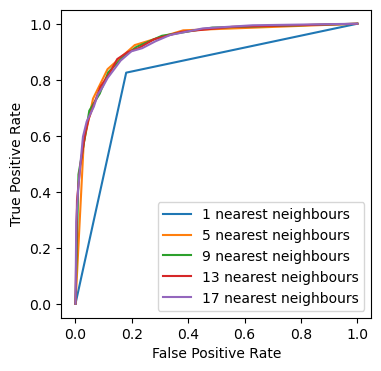

In [7]:
fig,ax=plt.subplots(figsize=(4,4))
for i in range(0,20,4):
    y_score_knn=model_knn[i].predict_proba(X_test)[:,1]
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
    roc_display_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn).plot(ax,label='%s nearest neighbours' %(i+1))
plt.show()

2. Do the same thing for the decision tree classifier. How does the max_depth influences the ROC curves?

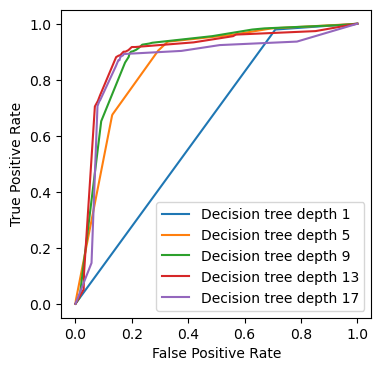

In [8]:
fig,ax=plt.subplots(figsize=(4,4))
for i in range(0,20,4):
    y_score_tree=model_tree[i].predict_proba(X_test)[:,1]
    fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
    roc_display_tree = RocCurveDisplay(fpr=fpr_tree, tpr=tpr_tree).plot(ax,label='Decision tree depth %s' %(i+1))
plt.show()

3. Finally, plot the ROC curves for the logistic regression classifier, k-nearest neighbors classifier (for k = 5) and for the decision tree classifier (for max_depth = 11). Which differences do you notice between the different  models? 

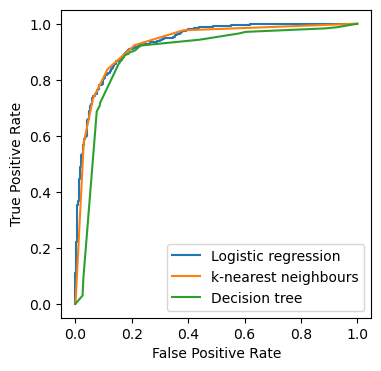

In [9]:
y_score_log_reg=model_log_reg.predict_proba(X_test)[:,1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_score_log_reg)
y_score_knn=model_knn[4].predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
y_score_tree=model_tree[10].predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)

fig,ax=plt.subplots(figsize=(4,4))
roc_displayog_reg = RocCurveDisplay(fpr=fpr_log_reg, tpr=tpr_log_reg).plot(ax,label='Logistic regression')
roc_display_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn).plot(ax,label='k-nearest neighbours')
roc_display_tree = RocCurveDisplay(fpr=fpr_tree, tpr=tpr_tree).plot(ax,label='Decision tree')
plt.show()

Overall, how do the ROC curves compare to the metrics you had displayed in the dataframe above?

Using the following cell, you can display the decision tree that you have trained. Run the code for different __max_depth__ and see how your tree changes.

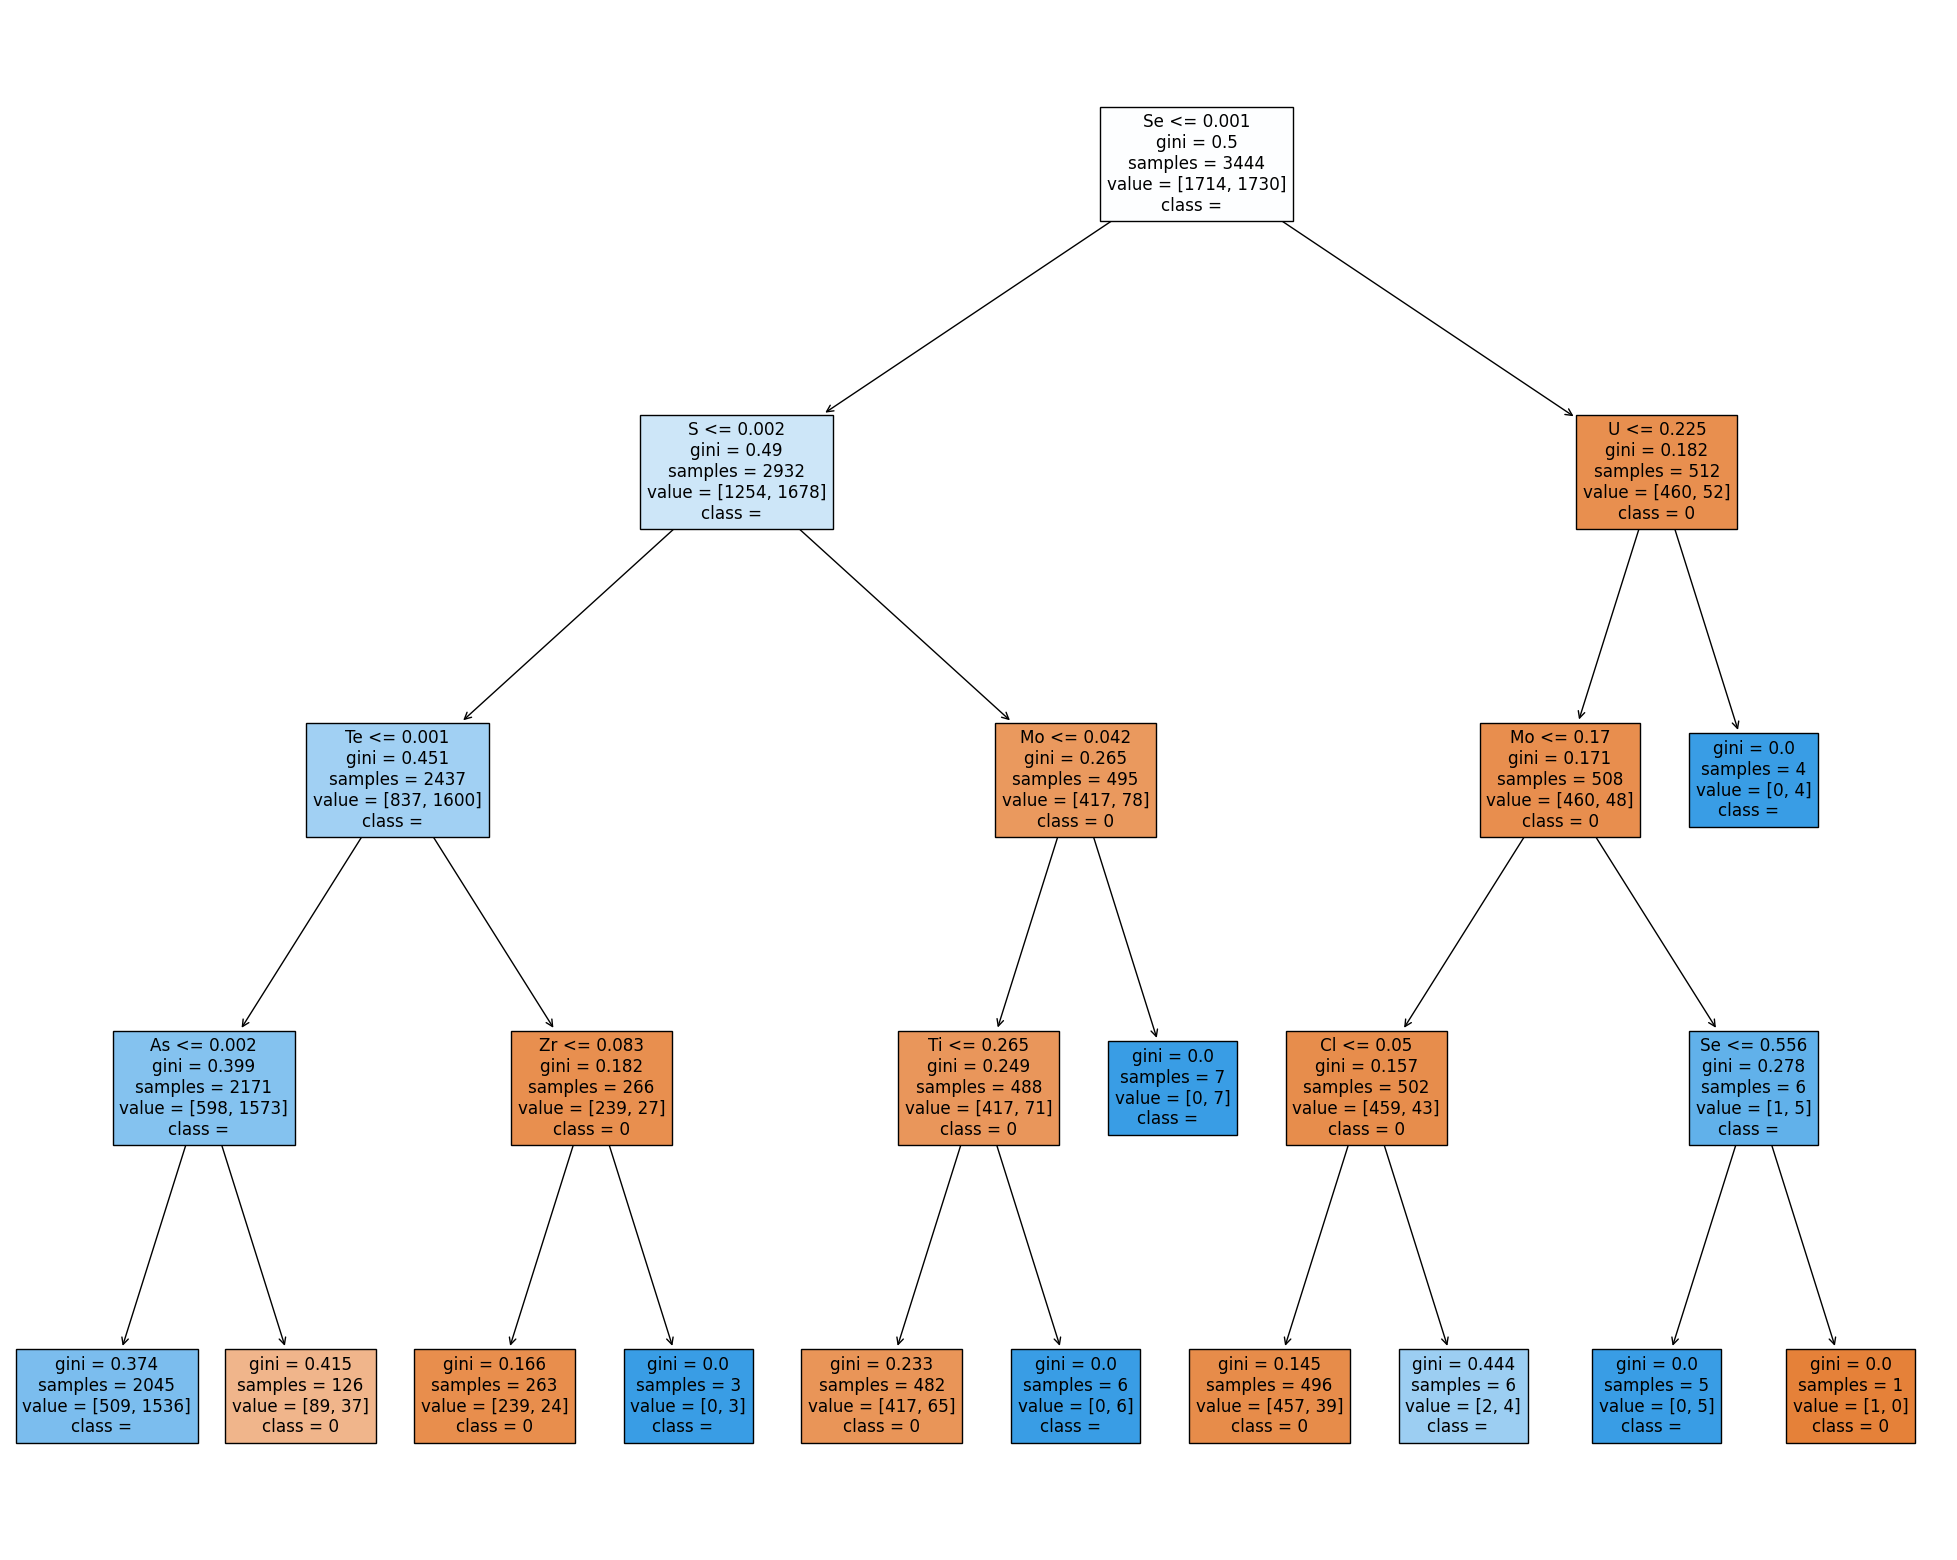

In [10]:
clf=model_tree[3]
fig = plt.figure(figsize=(25,20))
treeinfo=tree.plot_tree(clf,  
                   feature_names=df.drop(["formula","is_metal","composition"],axis=1).columns, 
                   class_names=str(df['is_metal']),
                   filled=True)
#fig.savefig("decision_tree_depth%d.png" % i)

<a name="cite_note-1"></a>1.[^](#cite_ref-1) Y. Zhuo, A.M. Tehrani, and J. Brgoch, J. Phys. Chem. Lett. 2018, 9, 7, 1668–1673, https://doi.org/10.1021/acs.jpclett.8b00124